<font size="6"> Linear Model on R</font>

<font size="4"> 1. Exploration on Data</font>

In [7]:
library(tidyverse)
library(reshape2)

In [16]:
# Original data
df <- read.csv("regrex1.csv")
head(df)

,y,x
,<dbl>,<dbl>
1,6.8102,9.8492
2,9.8437,11.1450
3,4.9767,5.1209
4,5.0006,8.1085
5,3.5047,3.5599
6,3.6419,1.9883


In [9]:
summary(df)

       y                x          
 Min.   : 2.281   Min.   : 0.8347  
 1st Qu.: 3.830   1st Qu.: 3.6437  
 Median : 7.006   Median : 9.8750  
 Mean   : 6.971   Mean   :10.0678  
 3rd Qu.: 9.257   3rd Qu.:14.4428  
 Max.   :15.000   Max.   :25.0000  

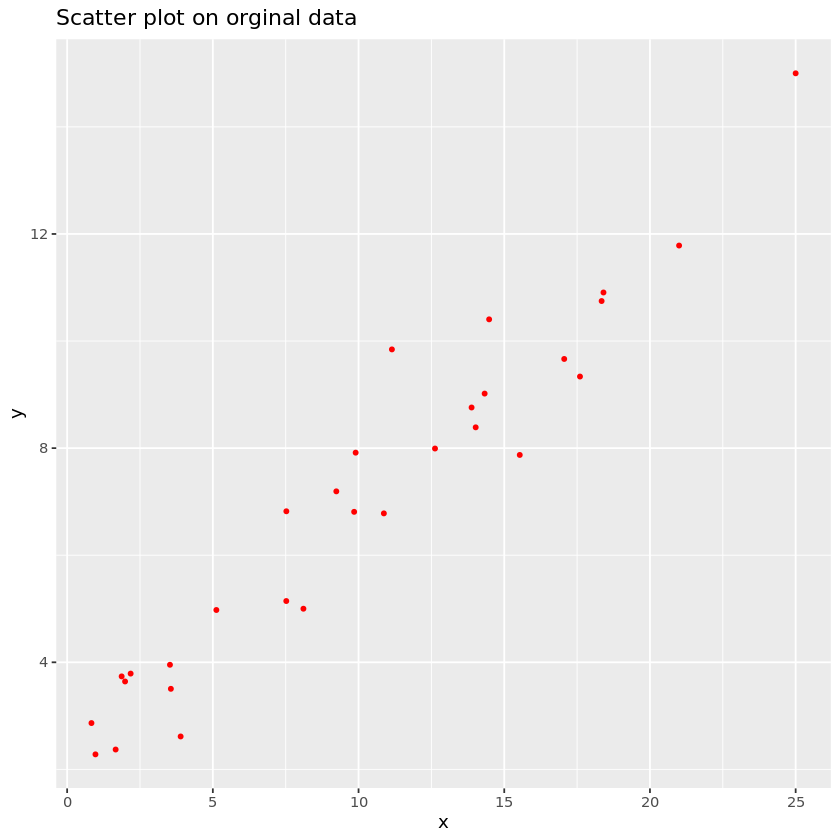

In [10]:
# Scatter plot on original data
ggplot(mapping = aes(x=df$x,y=df$y)) +
  geom_point(colour="red",size=1) +
  xlab("x") +
  ylab("y") +
  ggtitle("Scatter plot on orginal data")

<font size="4"> 2. Linear Model</font>

In [11]:
model <- lm(y~x,data=df)
summary(model)


Call:
lm(formula = y ~ x, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66121 -0.53286 -0.02869  0.50436  2.36786 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.24814    0.29365   7.656 2.44e-08 ***
x            0.46906    0.02444  19.194  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8779 on 28 degrees of freedom
Multiple R-squared:  0.9294,	Adjusted R-squared:  0.9268 
F-statistic: 368.4 on 1 and 28 DF,  p-value: < 2.2e-16


In [12]:
# coefficients
coef(model)

(Intercept)           x 
  2.2481428   0.4690623

In [13]:
# store slope and intercept
s <- coef(model)[2]
i <- coef(model)[1]

<font size="4"> 3. Plot Linear Model</font>

In [17]:
# combine and rename columns
df$fitted <- model$fitted.values
names(df) <- c("original","test_x","predicted")
head(df)

,original,test_x,predicted
,<dbl>,<dbl>,<dbl>
1,6.8102,9.8492,6.868031
2,9.8437,11.1450,7.475842
3,4.9767,5.1209,4.650164
4,5.0006,8.1085,6.051534
5,3.5047,3.5599,3.917958
6,3.6419,1.9883,3.180779


In [18]:
# melt dataframe 
dfm <- melt(df,id.var="test_x",variable.name="y_type",value.name = "y_value")
head(dfm)

,test_x,y_type,y_value
,<dbl>,<fct>,<dbl>
1,9.8492,original,6.8102
2,11.1450,original,9.8437
3,5.1209,original,4.9767
4,8.1085,original,5.0006
5,3.5599,original,3.5047
6,1.9883,original,3.6419


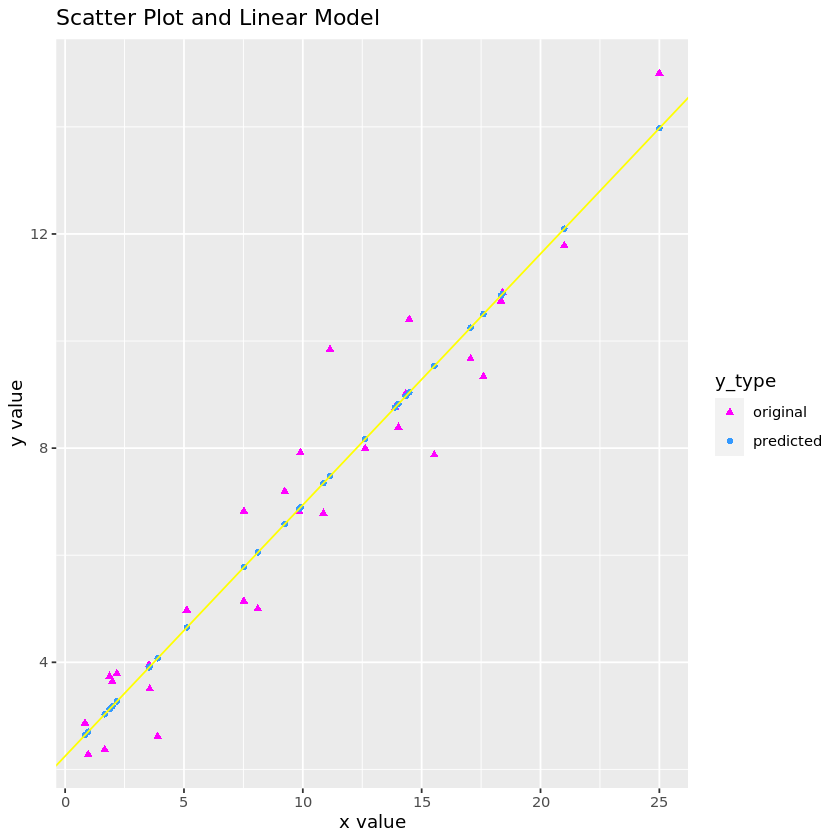

In [21]:
ggplot(dfm, aes(x = test_x, y =y_value , shape = y_type, color = y_type))+
  geom_point()+
  geom_abline(slope = s,intercept = i,colour="yellow")+
  scale_color_manual(values = c("original" = '#ff00ff','predicted' = '#3399ff')) + 
  scale_shape_manual(values = c('original' = 17, 'predicted' = 16))+
  ggtitle("Scatter Plot and Linear Model") +
  xlab("x value")+
  ylab("y value")